# LDA
Condider Fisher's iris data.

In [4]:
# Import the necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True).frame
iris_features = iris.drop(columns='target')
iris_target_names = load_iris().target_names
iris['target'] = iris['target'].map({0: iris_target_names[0], 1: iris_target_names[1], 2: iris_target_names[2]})
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Consider Fisher’s iris data, Repeat the example [2.6?] in the book and show the data in 1–D, along with the kernel density estimate

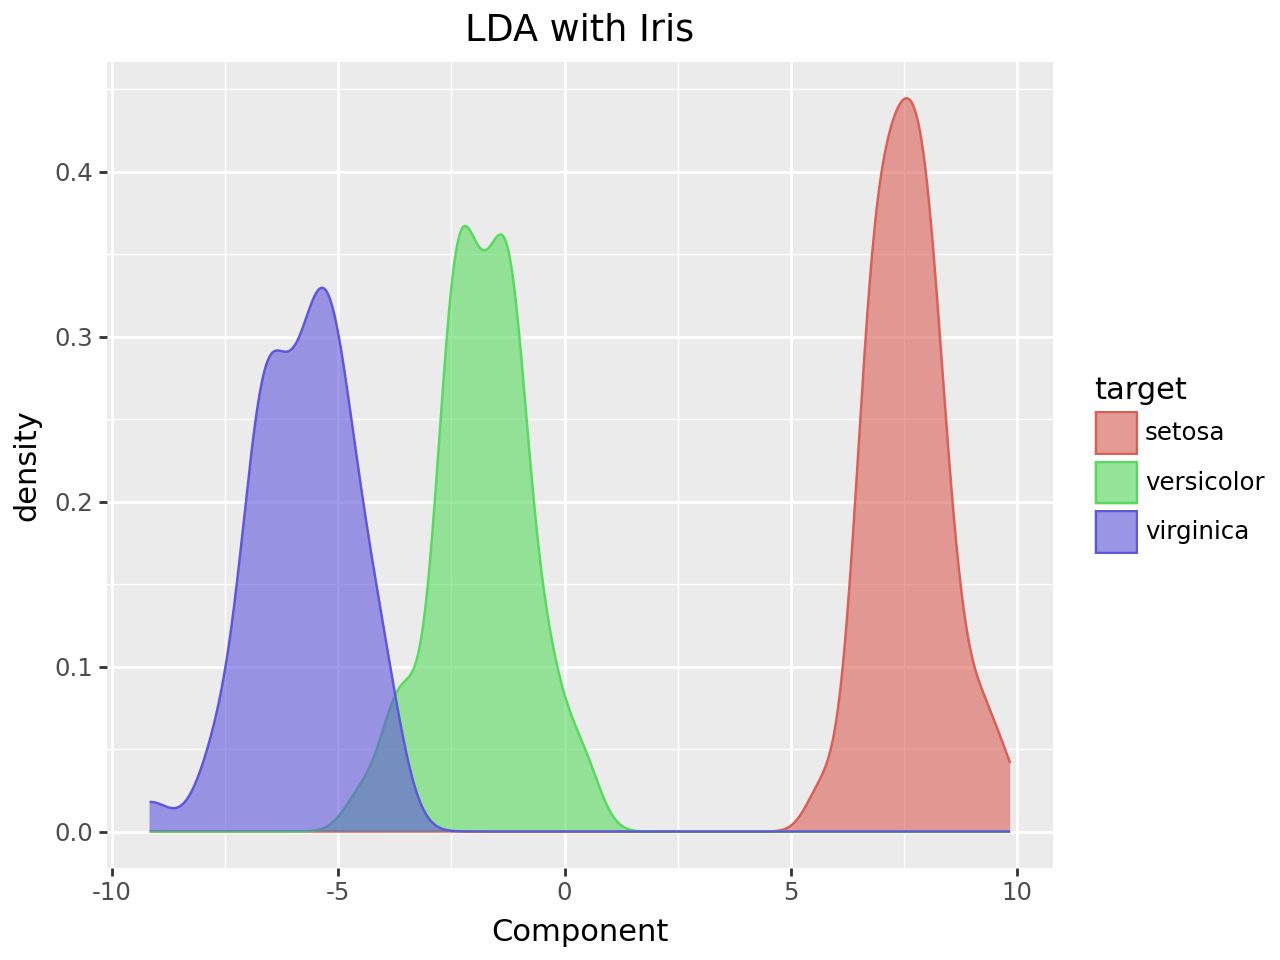

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from plotnine import *
# lda with iris
lda = LDA(n_components=1)
Z = lda.fit_transform(iris_features, iris["target"])
(
  ggplot(
    pd.DataFrame({"Component": Z.flatten(), "target": iris["target"]}),
    aes(x = 'Component', color = 'target', fill = "target")
  )
  + geom_density(alpha = 0.6) 
  + ggtitle("LDA with Iris")
)


Discuss how good the mappings are for each case:

a) Taking two classes at a time, i.e., [setosa, versicolor]; [versicolor, virginica];  [virginica,  setosa].

In [42]:
from itertools import combinations
from matplotlib import pyplot as plt
plots = []
lda = LDA(n_components=1)
for target in iris_target_names:
  # filter out target
  iris_filtered = iris[iris["target"] != target]
  Z = lda.fit_transform(iris_filtered.drop(columns="target"), iris_filtered["target"])
  plot = (
    ggplot(
      pd.DataFrame({"Component": Z.flatten(), "target": iris_filtered["target"]}),
      aes(x = 'Component', color = 'target', fill = "target")
    ) 
    + geom_density(alpha = 0.6) 
    + ggtitle(f"LDA of Iris without {target}")
  )
  plots.append(plot)

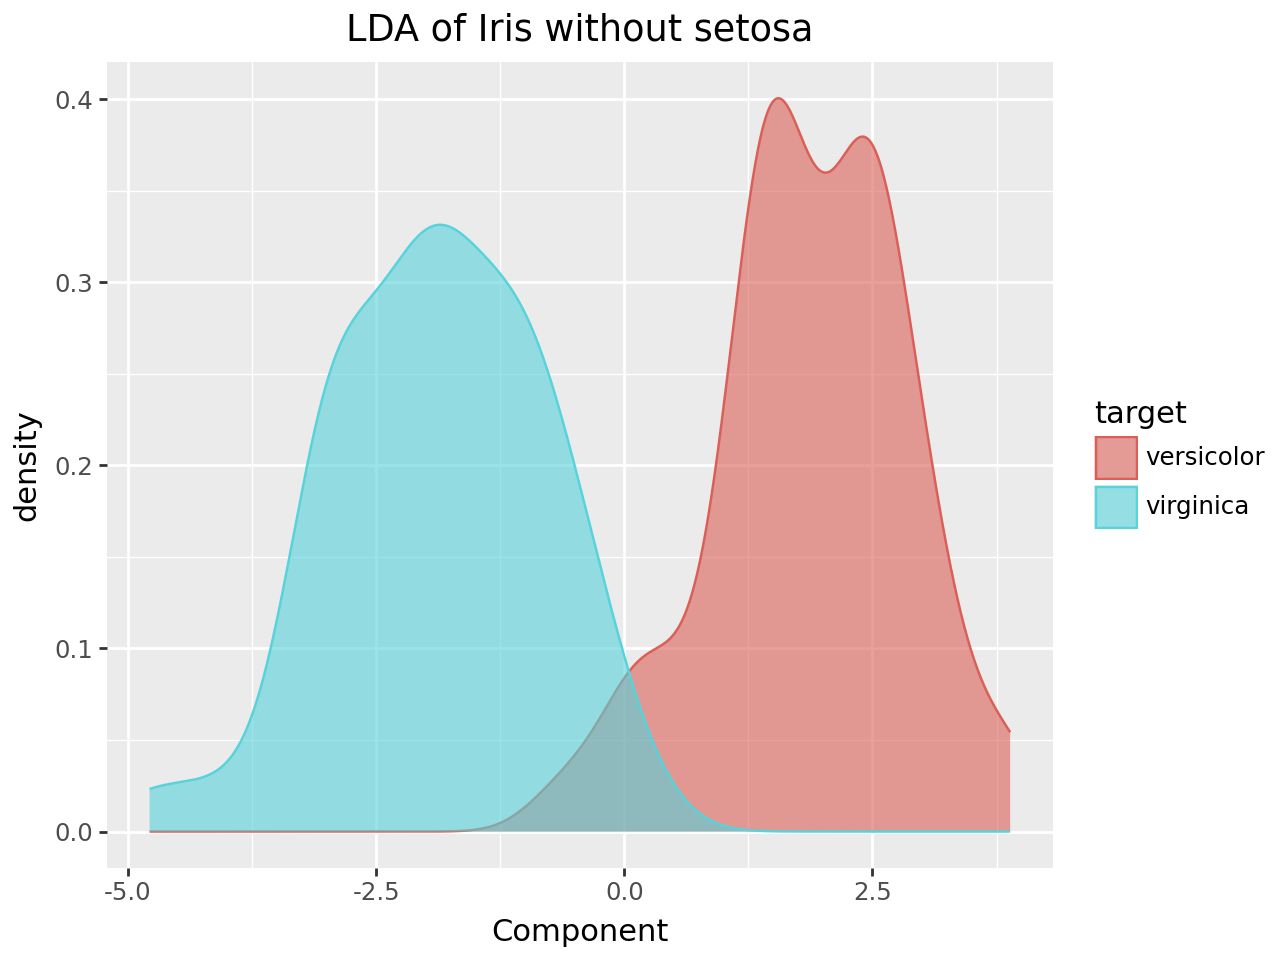

In [43]:
plots[0]

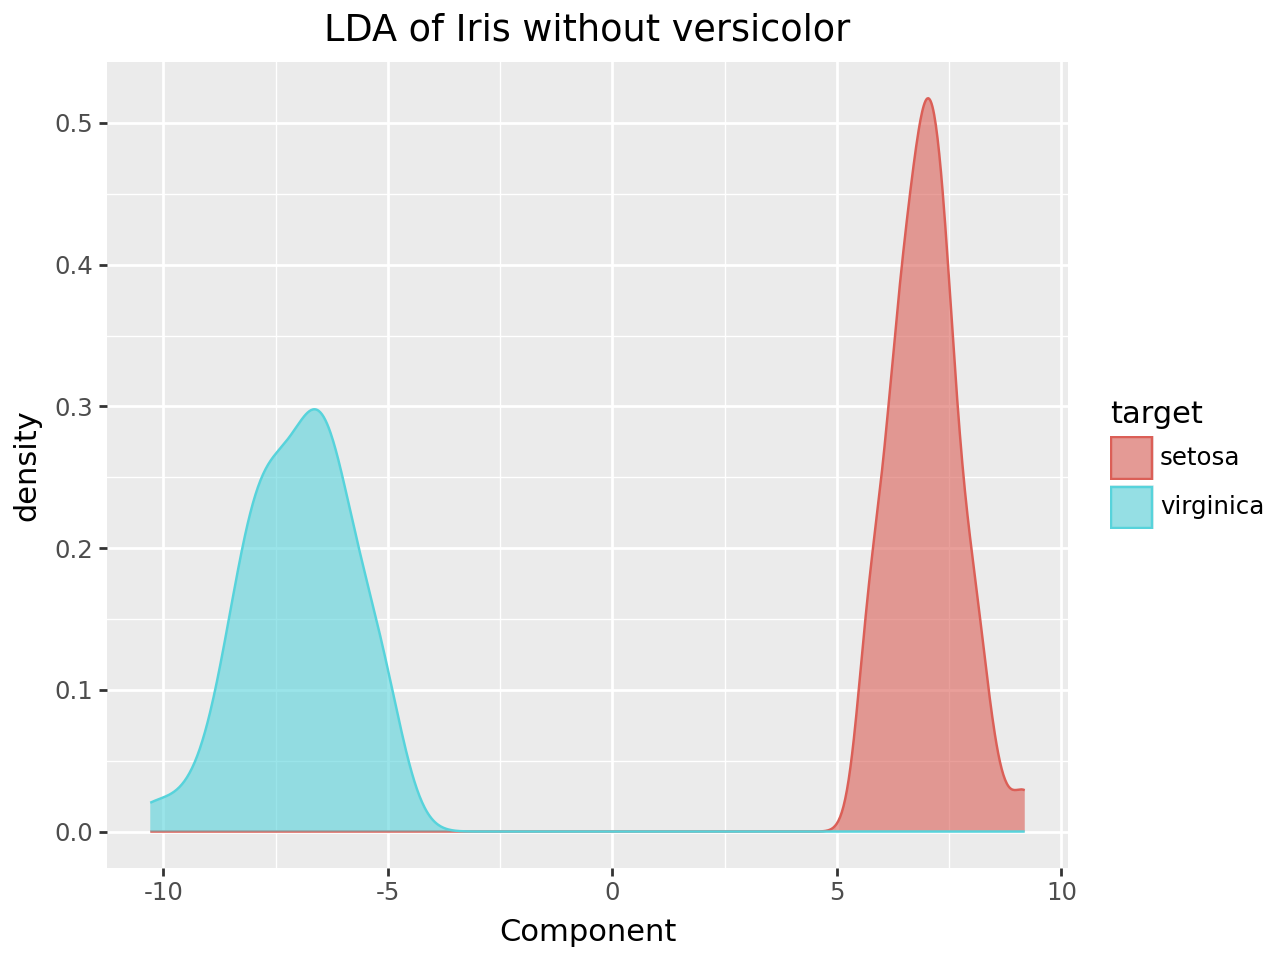

In [44]:
plots[1]

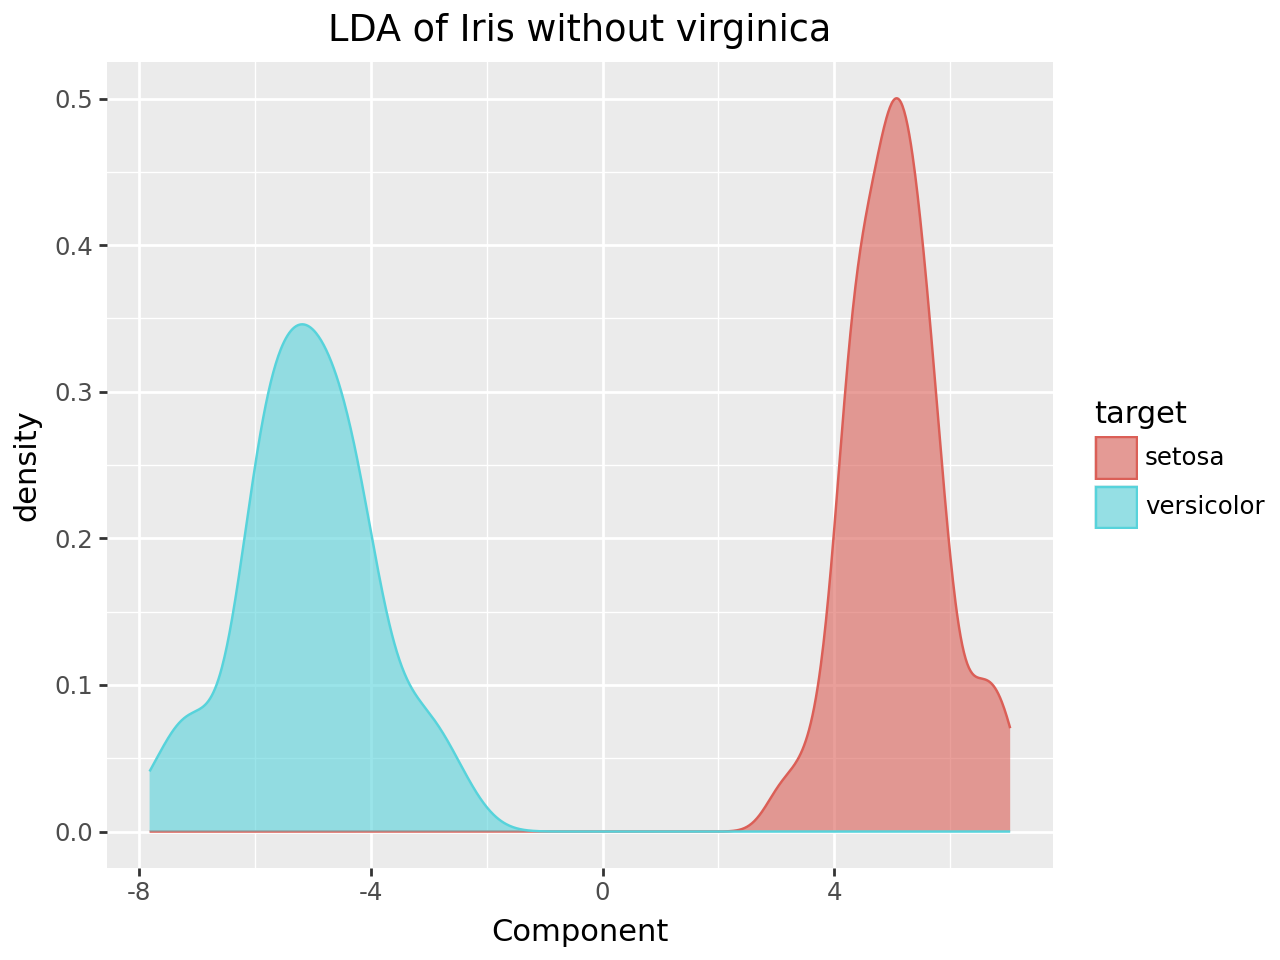

In [45]:
plots[2]

b) looking at the data in another way and take the two classes as [Sepals, Petals].

In [ ]:
iris # have no idea what this means

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
